In [6]:
from mypgm.base import Factor, CPD, RandomVar
from mypgm.exacted import VariableElimination
from mypgm.pgms import BayesianNetwork
from mypgm.approximated import MarkovRF
import numpy as np

In [7]:
# three random variable each with 2 possible values
A = RandomVar('A', 2)
B = RandomVar('B', 2)
C = RandomVar('C', 2)

# CPD for the model: A and C influences B
#fC = CPD(scope=[C, A], values=[0.99, 0.99, 0.01, 0.01])
fC = CPD(scope=[C], values=[0.99, 0.01])
fA = Factor([A], values=np.array([0.9, 0.1]))
fB_AC = Factor([B, C, A], values=np.array([0.9, 0.5, 0.4, 0.1, 0.1, 0.5, 0.6, 0.9]))

bn = BayesianNetwork([fC, fA, fB_AC])
bn.add_var_to(fC, A)


#mrf=MarkovRF(bn.factors)
mrf=bn.to_markov_model()
iters, converged = mrf.lbp(normalize=True)
print('LBP ran for %d iterations. Converged = %r' % (iters, converged))


# Print out the final marginals
mrf.print_rv_marginals()


LBP ran for 3 iterations. Converged = True
Marginals for RVs (normalized):
C
	 0 	 0.99
	 1 	 0.010000000000000002
A
	 0 	 0.9
	 1 	 0.1
B
	 0 	 0.8551000000000001
	 1 	 0.1449


Posterior for: A 
(0,) -> 0.9
(1,) -> 0.1

Posterior for: B 
(0,) -> 0.8551
(1,) -> 0.14490000000000003

Posterior for: C 
(0,) -> 0.99
(1,) -> 0.010000000000000002

Posterior for: A 
(0,) -> 0.6428571428571429
(1,) -> 0.35714285714285715

Posterior for: A 
(0,) -> 0.9419950882937669
(1,) -> 0.058004911706233196

Maximum a posteriori: [(A, 0)]
Posterior for: A B 
(0, 0) -> 0.8055
(0, 1) -> 0.09450000000000001
(1, 0) -> 0.049600000000000005
(1, 1) -> 0.0504



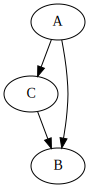

In [8]:
# three random variable each with 2 possible values
A = RandomVar('A', 2)
B = RandomVar('B', 2)
C = RandomVar('C', 2)

# CPD for the model: A and C influences B
#fC = CPD(scope=[C, A], values=[0.99, 0.5, 0.01, 0.5])
fC = CPD(scope=[C], values=[0.99, 0.01])
fA = CPD(scope=[A], values=[0.9, 0.1])
fB_AC = CPD(scope=[B, C, A], values=[0.9, 0.5, 0.4, 0.1, 0.1, 0.5, 0.6, 0.9])

bn = BayesianNetwork([fC, fA, fB_AC])
bn.add_var_to(fC, A)

ve = VariableElimination(bn)

print('Posterior for:', ve.marginal([A]))
print('Posterior for:', ve.marginal([B]))
print('Posterior for:', ve.marginal([C]))

#marginal query on A given an evidence on C and B
print('Posterior for:', ve.marginal([A], [(B, 1), (C, 0)]))
#marginal query on A given an evidence on B 
print('Posterior for:', ve.marginal([A], [(B, 0)]))
#map query on A given an evidence on C and B
print('Maximum a posteriori:', ve.map_query([(B, 1), (C, 0)]))
#Marginal distribution for A and B
print('Posterior for:', ve.marginal([A, B]))


bn.viz()